# Введие в пороги значимости (Significance Thresholds)

Иногда, когда мы проводим проверку гипотезы, мы просто сообщаем p-value или доверительный интервал (confidence interval) и объясним их обозначение при конкретных данных.

В других ситуациях мы хоти использовать наше p-value для принятия решения или ответа на вопрос "да/нет". Например, предположим, что мы разрабатываем новый вопрос викторины и хотим, чтобы учащиеся имели 70% шанс ответить на вопрос правильно (более высокий показатель будет означать, что вопрос слишком простой, более низкий - значит, что вопрос слишком сложный). Мы подказываем вопрос нашей викторины выборе из 100 учащихся, и 60 из них отвечают правильно. Значительно ли это отличается от нашей цели в 70%? Если да, то мы хотим удалить вопрос и попытаться переписать его.

Чтобы превратить p-value, в ответ "да" или "нет", специалисты данных, часто использут заранее установленный порог значимости. Порог значимости может быть любым числом от 0 до 1, но обычно выбирают 0.05. P-value, которые меньше этого порога, считаются "значимыми", тогда как более высокие значения p считаются "незначимыми".

## Объяснение P-value осованный на пороге значимости

Давайте вернемся к примеру с вопросом викторины - мы хотим удалить наш вопрос викторины с нашего веб-сайта, если вероятность правильного ответа отличается от 70%. Предположим, мы собрали данные от 100 учащихся и провели проверку биноминальной гипотезы со следующими нулевыми и альтернативными гипотезами:
- Нулевая гипотеза: вероятность того, что учащийся ответит правильно, равна 70%
- Альтернативная: вероятность того, что учащийся ответит на вопрос правильно, не равно 70.

Предполагая, что мы установили порог значимости 0.05 для этого теста:
- Если значение p-value меньше 0.05, значение p является значимым. "Отбросим нулевую гипотезу" и сделаем выводЮ что вероятность правильного ответа существенно отличается от 70%. Это заставило бы нас переписать вопрос
- Если значение p-value больше 0.05, значение p не является значимым. Мы не сможем отвергнуть нулевую гипотезу и придем к выводу, что вероятность правильного ответа существенно отличается от 70%. Это поубдит нас оставить вопрос на сайте.

## Типы ошибок

Всякий раз, когда мы проводим проверку гипотезы с использованием порога значимости, мы подвергаем себя ошибкам двух разных типов
- ошибка типа 1 - ложноположительный результат
- ошибка типа 2 - ложноотрицательный результат

Null hypothesis - is true - is false

P-value significant - Type I Error - Correct!

P-value not significant - Correct! - Type II error

Рассмотрим тест гипотезы вопроса викторины, описанный в предудыщем блоке:
- Нулевая гипотеза: вероятность того, что учащийся ответит на вопрос правильно, составляет 70%
- Альтернативная гипотеза: вероятность того, что учащийся ответит на вопрос правильно, не равна 70%

Предположим на мгновение, что истинная вероятность того, что учащийся правильно ответит на вопрос, составляет 70% (если бы мы показали вопрос ВСЕМ учащимся, ровно 70% ответили бы на него правильно). Это помещает сам в первый столбец таблицы выше (нулевая гипотеза "верная"). Если мы запустим тест и вычислим значимое значение p-value, мы совершим ошибку типа 1 (также называемую ложноположительным, поскольку значение p является ложно значимым), что приведет к тому, что мы удалим вопросЮ когда нам его на нужно.

С другой стороны, если истинная вероятность правильного ответа на вопрос не составляет 70% нулевая гипотеза "ложна" (самый правый столбец нашей таблицы). Если мы запустим тест и вычислим неначительно значение p, мы допустим ошибку второго рода, что приведет к тому, что мы оставми вопрос на нашем сайте хотя на следовало его удалить.

## Установка частоты ошибок типа 1

Оказывается когда мы запускаем проверку гипотезы с порогом значимости, порог значимости равен частоте ошибок типа 1 (ложноположительных результатов) для теста. Чтобы увидеть это, мы можем использовать моделирование.

Вспомните наш пример с вопросом викторины:
- нулевая гипотеза состоит в том, что вероятность правильного ответа на вопрос викторины равна 70%. Мы совершим ошибку 1 рода, если нулевая гипотеза верна (истинная вероятность правильного ответа составляет 70%), но в любом случае мы получим значимое значение p.

In [9]:
# Import libraries
import numpy as np
from scipy.stats import binomtest

# Initialize num_errors
false_positives = 0
# Set significance threshold value
sig_threshold = 0.05

# Run binomial tests & record errors
for i in range(1000):
    sim_sample = np.random.choice(['correct', 'incorrect'], size=100, p=[0.8, 0.2])
    num_correct = np.sum(sim_sample == 'correct')
    p_val = binomtest(num_correct, 100, .7).pvalue
    if p_val < sig_threshold:
        false_positives += 1

# Print proportion of type I errors 
print(false_positives/1000)

0.645


## Проблемы с тестирование мультигипотез

Хотя пороги значимости позволяют специалисту по обработке данных контролировать уровень ложноположительных результатов для одной проверки гипотезы, это начинает нарушаться при выполнении нескольких тестов в рамках одного исследования.

Например, предположим, что мы пишем тест, который будет включать 10 вопросов. Для каждого вопроса мы хотим знать, отличается ли вероятность того, что учащиеся правильно ответит на вопрос, от 70%. Теперь нам нужно запустить 10 тестов гипотез, по одному на каждый вопрос.

Если нулевая гипотеза верна для каждого теста гипотезы (вероятность правильного ответа составляет 70% для каждого вопроса) и мы используем уровень значимости 0.05 для каждого теста, то:
- Когда мы запускаем проверку гипотезы для одного вопроса, у нас есть 95% шанс получить правильный ответ (значение р > 0.05) - и 5% вероятность допустить ошибку первого рода
- Когда мы запускам проверку гипотез для двуз вопросв, у нас есть только 90% шанс получить правильный ответ на оба теста (0.95 * 0.95 = 0.90) - и 10% вероятность допустить хотя бы одну ошибку 1 рода
- Когда мы запускаем проверку гипотез для всех 10 вопросов, у нас есть 60% шанс получить правильный ответ на все десять проверок гипотез (0.95^10 = 0.60) - и 40% вероятность допустить хотя бы одну ошибку 1 рода

Чтобы решить эту проблему, важно заранее спланировать исследование: решить, какие вопросы вы хотите решить, и выяснить, сколько тестов гипотез вам нужно провести. При выполнении нескольких тестов используйте более низкий порог значимости (например, 0.01) для каждого теста, чтобы снизить вероятность ошибки типа 1.

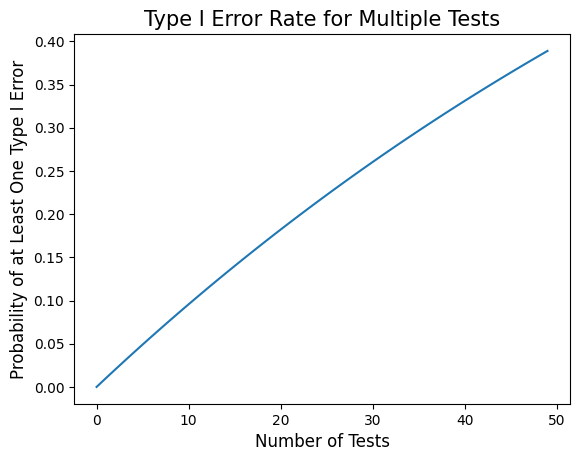

In [ ]:
# код ниже отображает график, показывающий вероятность совершения хотя бы одной ошибки 1 рода среди нокторого количества тестов с порогом значимости 0.05. Сколько примерно тестов нам придется провести при уровне значимости 0.05, чтобы вероятность хотя бы одной ошибки 1 рода составила 50%?
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Set a correct value for num_tests_50percent
num_tests_50percent = None


# Create the plot
sig_threshold = 0.01 # при уменьшении данного показателя уменьшается вероятность возникновения ошибки 1 рода
num_tests = np.array(range(50))
probabilities = 1-((1-sig_threshold)**num_tests)
plt.plot(num_tests, probabilities)

# Edit title and axis labels
plt.title('Type I Error Rate for Multiple Tests', fontsize=15)
# Label the y-axis
plt.ylabel('Probability of at Least One Type I Error', fontsize=12)
# Label the x-axis
plt.xlabel('Number of Tests', fontsize=12)

# Show the plot                
plt.show()